# Copula

Source Code:
<br>
© Thomas Robert Holy 2019
<br>
Version 0.1.0

## Import Packages

In [43]:
from scipy import array, linalg, dot
from scipy.stats import rankdata, norm
import random
import numpy as np
import math
import operator
import scipy.stats as st
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

## Grundeinstellungen

In [44]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [45]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

SCREEN_WIDTH = 140
centered = operator.methodcaller('center', SCREEN_WIDTH)

plt.rcParams["figure.figsize"] = 20,10

## Simulation

In [46]:
summe_r_list = []
summe_r_cop_list = []
summe_xy_list = []
summe_liste = []

counter_total = 0
n = 10000


for i in range(1,n+1):
    #-----------------------------------------------------------------------------------------------------------
    # Gegeben:

    #-----------------------
    # Randverteilungen Gleichverteilung

    x_down = 10
    x_up = 20

    y_down = 8
    y_up = 22

    #-----------------------
    # Varianz
    #var = [0.0016, 0.000625, 0.0064]
    var = [4, 9]

    #-----------------------
    # Varianz-Kovarianz-Matrix

    #  a = array([[0.0016, 0.0004, 0.0016],[0.0004, 0.000625, 0.0004],[0.0016, 0.0004, 0.0064]])
    a = array([[4, 0],[0, 9]])

    #-----------------------
    # Zufallsvariablen

    #random_list = [0.1, 0.6, 0.9]
    #random_list = [0.1, 0.6]
    random_list = []

    n = 2

    for i in range(1,n+1):
        x = random.random()
        random_list.append(x)

    #random_list = [0.1, 0.6]

    #print('Gleichverteilte Pseudo-Zufallsvariablen:')
    #print(random_list)
    #print(' ')

    #-----------------------
    # Erwartungswerte

    #mu = [0.04, 0.015, 0.06]
    mu = [2, 3]

    #-----------------------------------------------------------------------------------------------------------
    # Cholesky-Zerlegung

    L = linalg.cholesky(a, lower=True)

    #print('Cholesky-Zerlegung:')
    #print(L)
    #print(' ')

    #-----------------------------------------------------------------------------------------------------------
    # Transformation in standardnormalverteilte ZV

    random_standard_norm_list = norm.ppf(random_list)
    #print('Standardnormalverteilte unabhängige Zufallsvariablen:')
    #print(random_standard_norm_list)
    #print(' ')

    #-----------------------------------------------------------------------------------------------------------
    # Transformation in standardnormalvertzeilte abhängie ZV

    r_list = []

    counter_L0 = 0
    counter_L1 = 0
    counter_mu = 0
    counter_random_standard_norm_list = 0

    #for i in range(0,3):
    for i in range(0,2):
        a = L[counter_L0][counter_L1] * random_standard_norm_list[counter_random_standard_norm_list]
        counter_L1 += 1
        counter_random_standard_norm_list += 1

        b = L[counter_L0][counter_L1] * random_standard_norm_list[counter_random_standard_norm_list]
        #counter_L1 += 1
        #counter_random_standard_norm_list += 1

        #c = L[counter_L0][counter_L1] * random_standard_norm_list[counter_random_standard_norm_list]
        counter_L1 = 0
        counter_random_standard_norm_list = 0
        counter_L0 += 1    

        #r = a  + b + c + mu[counter_mu]
        r = a  + b + mu[counter_mu]
        counter_mu += 1
        r_list.append(r)

    #print('Realisationen der standardnormalverteilten abhängigen Zufallsvariablen:')
    #print(r_list)
    #print(' ')

    #-----------------------------------------------------------------------------------------------------------
    # Transformation Realisationen der Gauss-Copula

    r_cop_list = []
    counter = 0
    #for i in range(0,3):
    for i in range(0,2):
        r_cop = (r_list[counter] - mu[counter]) / math.sqrt(var[counter])   
        p_value = st.norm.cdf(r_cop)
        counter += 1

        r_cop_list.append(p_value)

    #print('Zugehörige Wahrscheinlichkeiten der Gauss-Copula:')  
    #print(r_cop_list)
    #print(' ')

    #-----------------------------------------------------------------------------------------------------------
    # Gemeinsame Verteilung

    counter = 0
    #for i in r_cop_list:
    x = (x_up-x_down) * r_cop_list[0] + x_down
    y = (y_up-y_down) * r_cop_list[1] + y_down
    xy = (x,y)


    #print('Gemeinsame Verteilung von x und y:')
    #print(x)
    #print(y)
    #print(' ')

    #-----------------------
    # Summe

    summe = x + y
    #print('Summe:')
    #print(summe)
    
    #print(str(counter_total) + '----------------------------------------------------------------------\n')
    counter_total += 1

    summe_r_list.append(r_list)
    summe_r_cop_list.append(r_cop_list)
    summe_xy_list.append(xy)
    summe_liste.append(summe)

#print(summe_r_cop_list)
#print(summe_r_list)
#print(summe_xy_list)
#print(summe_liste)

# Graphische Ausgaben

## Realisationen abhängiger bivariat normalverteilter Zufallsvariablen

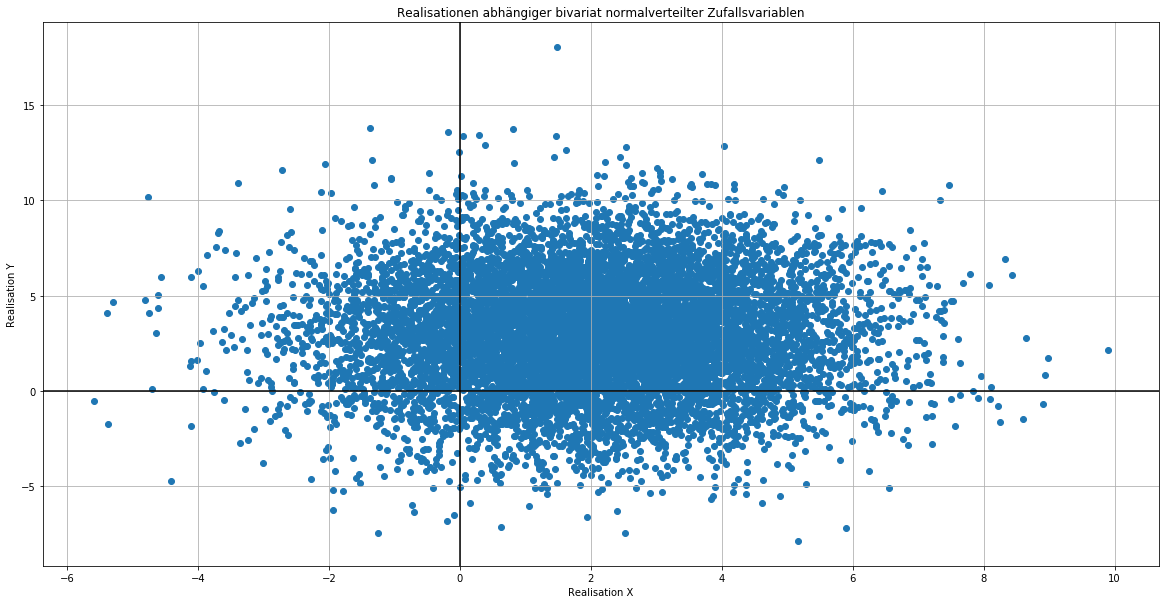

In [47]:
#----------------------------------------------------------
# Realisationen abhängiger bivariat normalverteilter Zufallsvariablen

counter_1 = 0
counter_2 = 0
x_liste = []
y_liste = []

for i in range(0,len(summe_r_list)):
    x = summe_r_list[counter_1][0]
    y = summe_r_list[counter_1][1]
    x_liste.append(x)
    y_liste.append(y)
    counter_1 += 1
    counter_2 += 1

#print(x_liste)
#print(y_liste)

plt.scatter(x_liste, y_liste)
plt.grid()
plt.xlabel('Realisation X')
plt.ylabel('Realisation Y')
plt.title('Realisationen abhängiger bivariat normalverteilter Zufallsvariablen')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.show()

## Realisationen Gauss-Copula

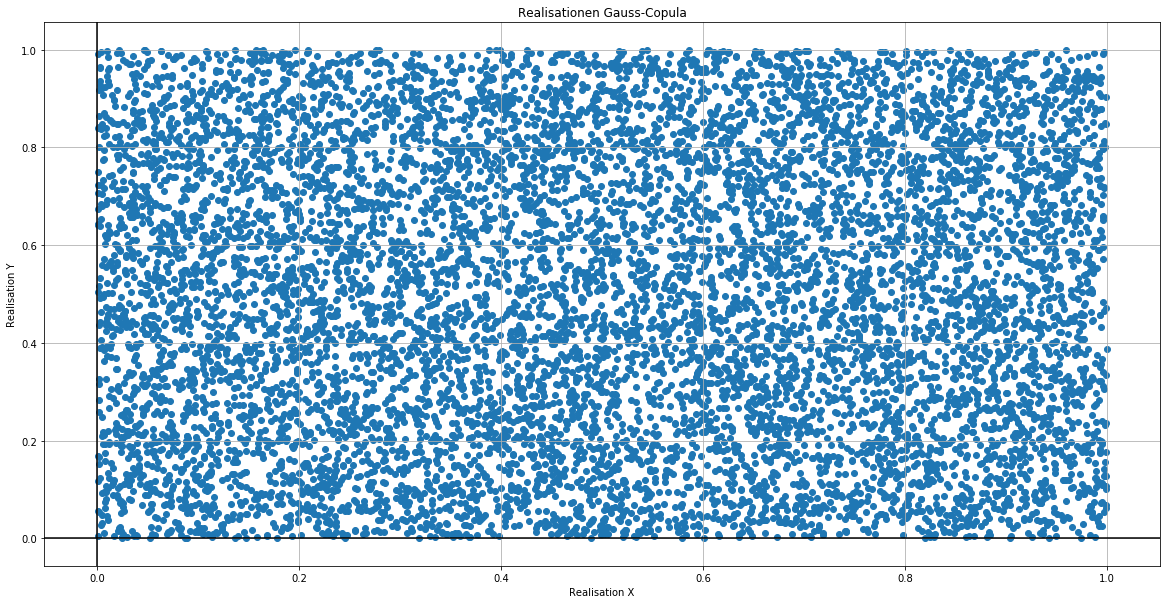

In [48]:
#----------------------------------------------------------
# Realisationen Gauss-Copula

counter_1 = 0
counter_2 = 0
x_liste = []
y_liste = []

for i in range(0,len(summe_r_cop_list)):
    x = summe_r_cop_list[counter_1][0]
    y = summe_r_cop_list[counter_1][1]
    x_liste.append(x)
    y_liste.append(y)
    counter_1 += 1
    counter_2 += 1

#print(x_liste)
#print(y_liste)

plt.scatter(x_liste, y_liste)
plt.grid()
plt.xlabel('Realisation X')
plt.ylabel('Realisation Y')
plt.title('Realisationen Gauss-Copula')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.show()

## Realisationen gleichverteilte X, Y mit Gauss-Copula

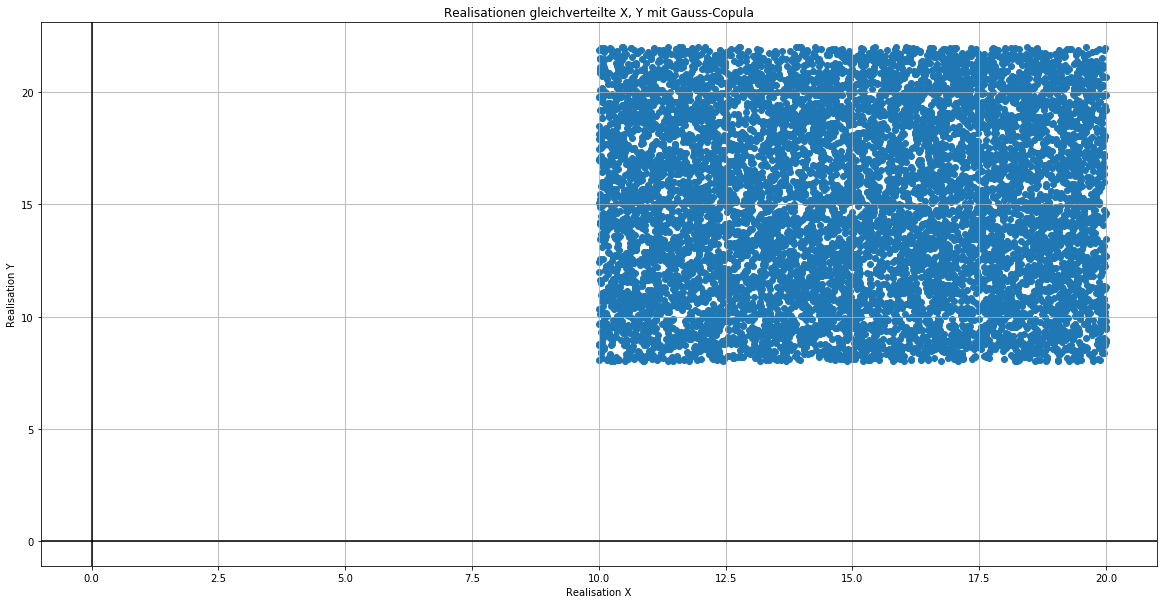

In [49]:
#----------------------------------------------------------
# Realisationen gleichverteilte X, Y mit Gauss-Copula

counter_1 = 0
counter_2 = 0
x_liste = []
y_liste = []

for i in range(0,len(summe_xy_list)):
    x = summe_xy_list[counter_1][0]
    y = summe_xy_list[counter_1][1]
    x_liste.append(x)
    y_liste.append(y)
    counter_1 += 1
    counter_2 += 1

#print(x_liste)
#print(y_liste)

plt.scatter(x_liste, y_liste)
plt.grid()
plt.xlabel('Realisation X')
plt.ylabel('Realisation Y')
plt.title('Realisationen gleichverteilte X, Y mit Gauss-Copula')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.show()

## Histogramm X+Y, Realisationen gleichverteilte X, Y mit Gauss-Copula

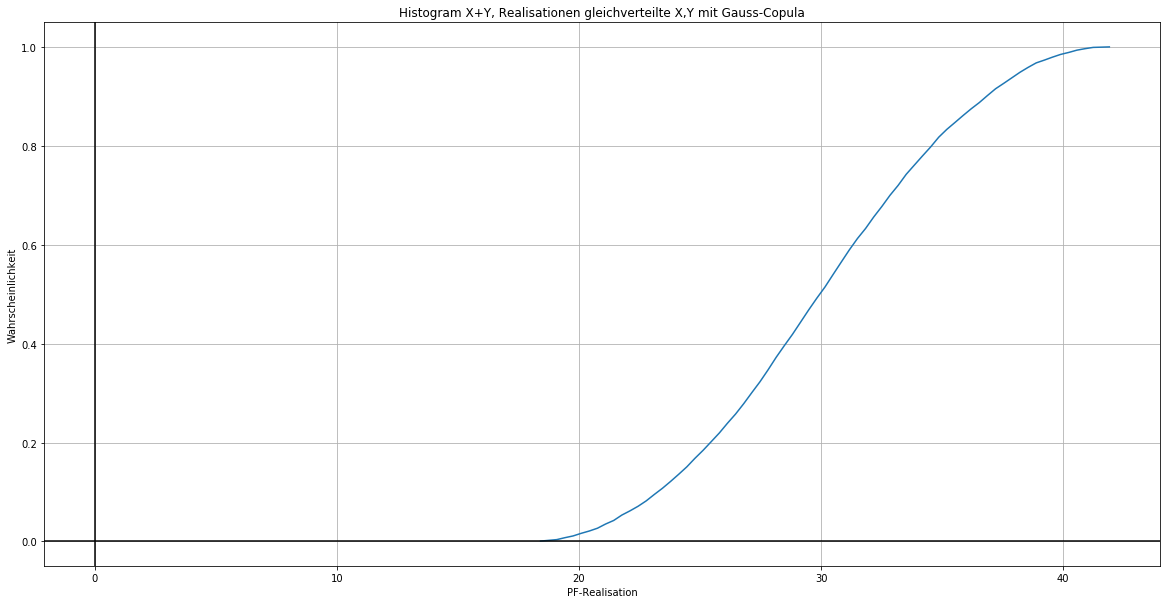

In [50]:
#----------------------------------------------------------
# Histogramm X+Y, Realisationen gleichverteilte X, Y mit Gauss-Copula

values_PF = summe_liste
bins = 71

H, X1 = np.histogram(values_PF, bins, density=True)
dx = X1[1] - X1[0]
F1 = np.cumsum(H)*dx
plt.plot(X1[1:], F1)


plt.grid()
plt.xlabel('PF-Realisation')
plt.ylabel('Wahrscheinlichkeit')
#blue_patch = mpatches.Patch(color='blue', label='Historische Simulation')
#orange_patch = mpatches.Patch(color='orange', label='Varianz-Kovarianzmethode')
#plt.legend(handles=[orange_patch, blue_patch])
plt.title('Histogram X+Y, Realisationen gleichverteilte X,Y mit Gauss-Copula')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.show()

## Verteilung X+Y, Realisationen gleichverteilte X, Y mit Gauss-Copula

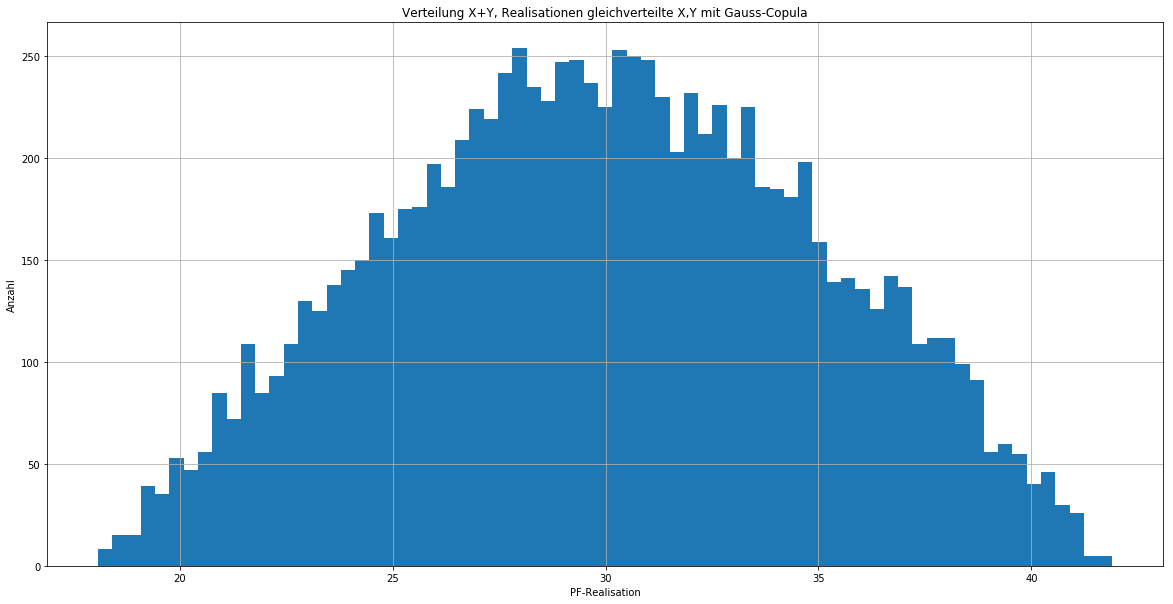

In [51]:
#----------------------------------------------------------
# Verteilung X+Y, Realisationen gleichverteilte X, Y mit Gauss-Copula

data = summe_liste
plt.hist(data, bins)
plt.grid()
plt.title('Verteilung X+Y, Realisationen gleichverteilte X,Y mit Gauss-Copula')
plt.xlabel('PF-Realisation')
plt.ylabel('Anzahl')
plt.show()